In [1]:
from pathlib import Path
import cv2
from PIL import Image
import random

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SequentialSampler
import tensorflow as tf
import tensorflow.keras.layers as tfl

C:\Users\tunki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda')
device=torch.device(device)

In [3]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [4]:
class TrafficData(Dataset):
    def __init__(self, df, image_dir, transforms=None):
        self.image_ids = df['Path'].unique()
        self.df = df
        self.image_dir = image_dir
        self.transforms = transforms

    def __getitem__(self, index, size = [100, 100]):
        image_path = self.image_ids[index]
        records = self.df[self.df['Path'] == image_path]

        print(f'{self.image_dir}/{image_path}')
        image = cv2.imread(f'{self.image_dir}/{image_path}', cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, size)
        image = image.astype(float) / 255.0

        target = records['ClassId'].values

        if self.transforms:
            image = self.transforms(**image)

        return image, target, image_path

    def __len__(self) -> int:
        return self.image_ids.shape[0]

    @staticmethod
    def create_dataset(df, dir, transform=None):
       dataset = TrafficData(df, dir)
       return dataset

    @staticmethod 
    def loader(dataset, batch_size, num_workers=0):
       data_loader = DataLoader(
          dataset,
          batch_size=batch_size,
          shuffle=True,
          num_workers=num_workers,
          #collate_fn = collate_fn
      )
       return data_loader

In [5]:
path = Path("Data_images")

In [14]:
#6 minutes
df_train = pd.DataFrame(columns=['ClassId', 'Path'])

train_path = path / 'Train'
for folder in train_path.glob("*"):
    #print(folder)
    class_id = int(str(folder)[len(str(train_path)) + 1:])
    for im in folder.glob("*"):
        #print(p)
        df_train = pd.concat([df_train, pd.DataFrame({'ClassId': [class_id], 'Path': [str(im)[len(str(path)) + 1:]]})], ignore_index=True)
        #df_train.loc[df_train.shape[0]] = [class_id, str(im)[len(str(path)) + 1:]]

df_train.head()

,ClassId,Path
0,0,Train\0\00000_00000_00000.png
1,0,Train\0\00000_00000_00001.png
2,0,Train\0\00000_00000_00002.png
3,0,Train\0\00000_00000_00003.png
4,0,Train\0\00000_00000_00004.png


In [7]:
#from random import shuffle

df_test = pd.read_csv('Data_Images/Test_data.csv')

train_data = TrafficData.create_dataset(df_train, path)
train_data_loader = TrafficData.loader(train_data, 16)

test_data = TrafficData.create_dataset(df_test, path)
test_data_loader = TrafficData.loader(test_data, 16)

In [8]:
df_test.shape

(53454, 2)

In [9]:
print(device)

cuda


In [18]:
images, targets, image_ids = next(iter(test_data_loader))

Data_images/Test/125_6_19.png
Data_images/Test/131_2_4.png
Data_images/Test/160_4_26.png
Data_images/Test/81_7_4.png
Data_images/Test/60_2_28.png
Data_images/Test/09673.png
Data_images/Test/83_4_26.png
Data_images/Test/129_3_35.png
Data_images/Test/184_1_13.png
Data_images/Test/121_1_21.png
Data_images/Test/180_7_12.png
Data_images/Test/05411.png


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [16]:
df_train.to_csv("Data_images/Train_data.csv")

In [19]:
type(images)

NameError: name 'images' is not defined

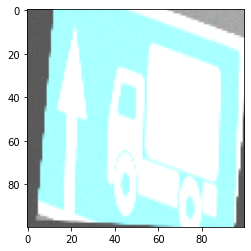

In [ ]:
p, _, _ = test_data.__getitem__(187)
plt.imshow(p)

In [ ]:
plt.imshow(images[random.randrange(images.__len__)])

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'method-wrapper'